In [345]:
from __future__ import print_function
import os
import sys
import pandas as pd
#import pandas_datareader as pdr
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [346]:
df = pd.read_csv(r'C:\Users\Sid\Documents\Code\dengue-data-resampled.csv')
df.head()
df = df.set_index('Date')
df.index= pd.to_datetime(df.index)
df.head()
df.shape

(7260, 84)

In [347]:
def missing_value_percentage(df):
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum().sort_values(ascending=False)!=0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)!=0]
    return pd.concat([total,percent],axis =1,keys= ['Total','Percent'])
missing_value_percentage(df)

,Total,Percent


In [348]:
df.iloc[:,21:31].describe()

,rainfall-admiralty-west,rainfall-ang-mo-kio,rainfall-boon-lay-east,rainfall-boon-lay-west,rainfall-botanic-garden,rainfall-buangkok,rainfall-bukit-panjang,rainfall-bukit-timah,rainfall-buona-vista,rainfall-chai-chee
count,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000,7260.000000
mean,4.007094,5.505647,16.191116,6.905697,12.463774,6.887790,7.361118,4.114738,4.074793,5.265702
std,4.491024,3.813497,11.813817,5.823793,6.652668,5.790930,5.611073,4.651609,4.744100,3.353191
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,3.724026,2.396154,5.618750,3.000000,3.151099,1.000000,1.000000,4.000000
50%,1.250000,4.000000,16.200000,6.000000,18.000000,5.714286,6.400000,1.000000,1.000000,5.000000
75%,5.857143,6.285714,28.000000,10.200000,18.000000,9.285714,10.181818,6.000000,6.000000,5.000000
max,34.000000,37.000000,33.000000,48.000000,38.000000,85.000000,66.000000,35.000000,48.000000,30.000000


In [349]:
df_old = pd.read_csv(r"C:\Users\Sid\Documents\Code\dengue-data-collated.csv")
df_old.iloc[:,21:31].describe()

,rainfall-admiralty,rainfall-admiralty-west,rainfall-ang-mo-kio,rainfall-boon-lay-east,rainfall-boon-lay-west,rainfall-botanic-garden,rainfall-buangkok,rainfall-bukit-panjang,rainfall-bukit-timah,rainfall-buona-vista
count,552.000000,486.000000,534.000000,321.000000,937.000000,479.000000,997.000000,1037.000000,540.000000,553.000000
mean,6.413043,6.956790,6.850187,7.364486,7.661686,6.759916,7.013039,7.371263,6.744444,6.674503
std,5.769912,6.301709,6.038652,6.180705,6.845811,6.273640,7.104133,6.847770,6.231277,6.482894
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,5.000000,6.000000,5.500000,6.000000,6.000000,5.000000,5.000000,6.000000,5.000000,5.000000
75%,9.000000,10.000000,10.000000,11.000000,11.000000,10.000000,10.000000,11.000000,10.000000,10.000000
max,31.000000,34.000000,37.000000,33.000000,48.000000,38.000000,85.000000,66.000000,35.000000,48.000000


Text(0.5, 1.0, 'dengue-sg')

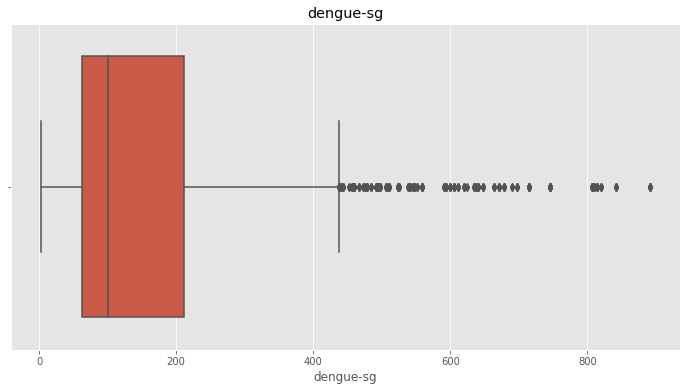

In [350]:
#plot
plt.figure(figsize=(12,6))
g = sns.boxplot(df['dengue-sg'])
g.set_title('dengue-sg')

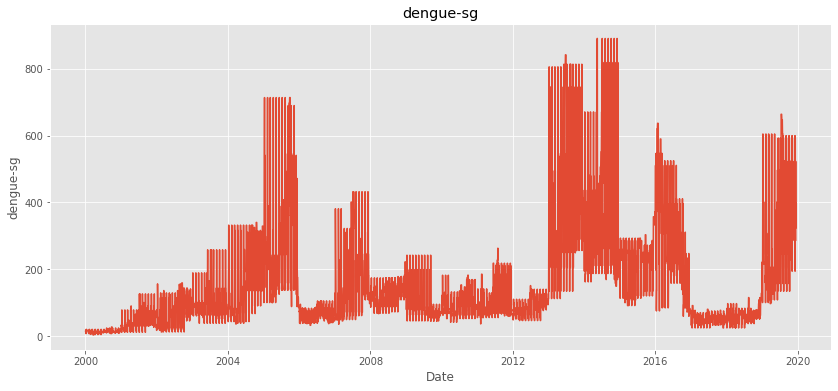

In [351]:
plt.figure(figsize=(14,6))
g = sns.lineplot(df.index,df['dengue-sg']) 
g.set_title('dengue-sg');

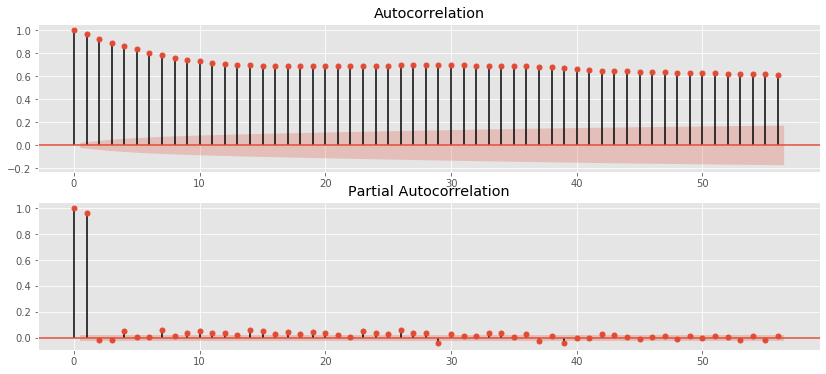

In [352]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(14,6))
ax1 = plt.subplot(211)
plot_acf(df['dengue-sg'], lags=56, ax=ax1);
ax2 = plt.subplot(212)
plot_pacf(df['dengue-sg'], lags=56, ax=ax2);

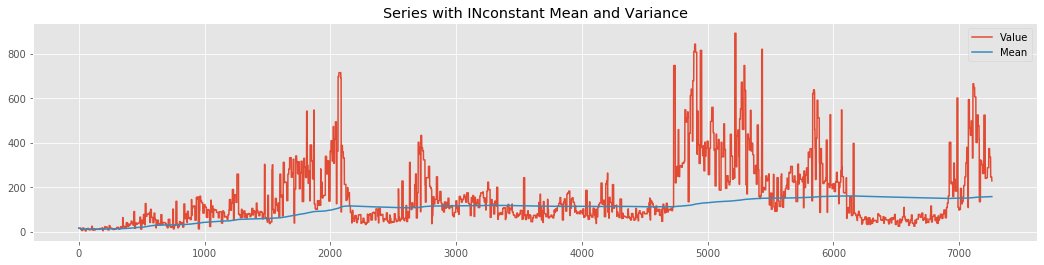

In [353]:
mean = [np.mean(df['dengue-sg'].values[:x]) for x in range(df['dengue-sg'].shape[0])]
plt.figure(figsize=(18,4))
plt.plot(df['dengue-sg'].values, label='Value')
plt.plot(mean, label='Mean')

plt.title('Series with INconstant Mean and Variance')
plt.legend()
plt.show()


In [354]:
#split the data
split_date = datetime.datetime(year=2019, month=10, day=12, hour=0)
df_train = df.loc[df.index<split_date]
df_val = df.loc[df.index>=split_date]
print('Shape of train:', df_train.shape)
print('Shape of test:', df_val.shape)

Shape of train: (7200, 84)
Shape of test: (60, 84)


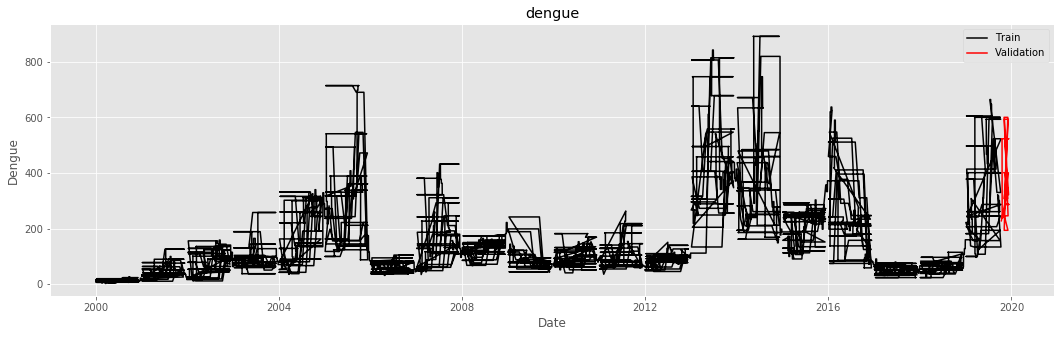

In [355]:
plt.figure(figsize=(18,5))
plt.title('dengue')
plt.plot(df_train['dengue-sg'], color='black')
plt.plot(df_val['dengue-sg'], color='red')
plt.legend(['Train','Validation'])
plt.xlabel('Date')
plt.ylabel('Dengue')
plt.show()


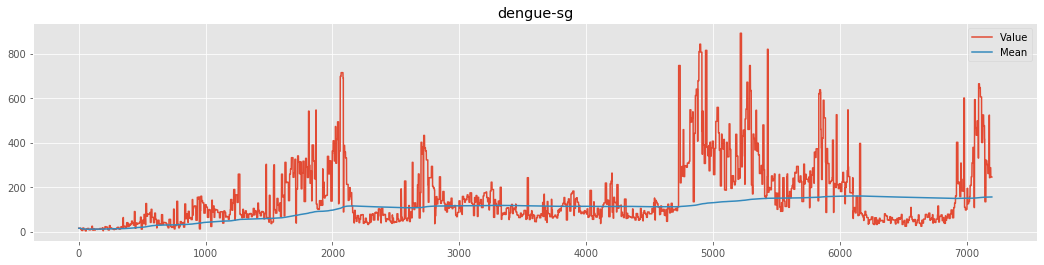

In [356]:
#need to smooth the training data
mean = [np.mean(df_train['dengue-sg'].values[:x]) for x in range(df_train['dengue-sg'].shape[0])]
plt.figure(figsize=(18,4))
plt.plot(df_train['dengue-sg'].values, label='Value')
plt.plot(mean, label='Mean')
plt.title('dengue-sg')
plt.legend()
plt.show()

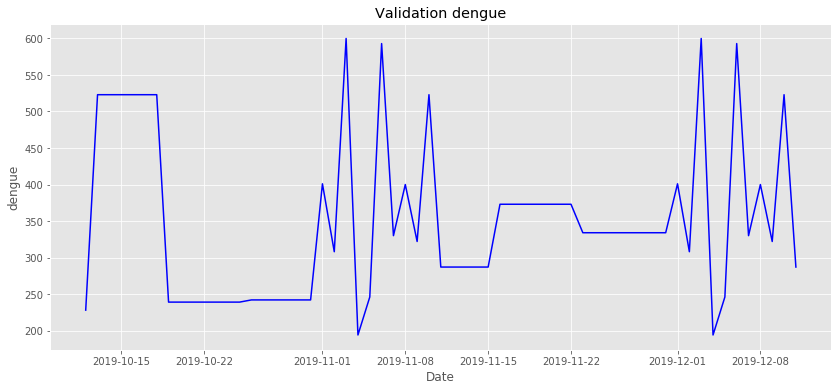

In [357]:
plt.figure(figsize=(14, 6))
g = sns.lineplot(df_val.index, df_val['dengue-sg'], color='b')
g.set_title('Validation dengue')
g.set_ylabel('dengue');

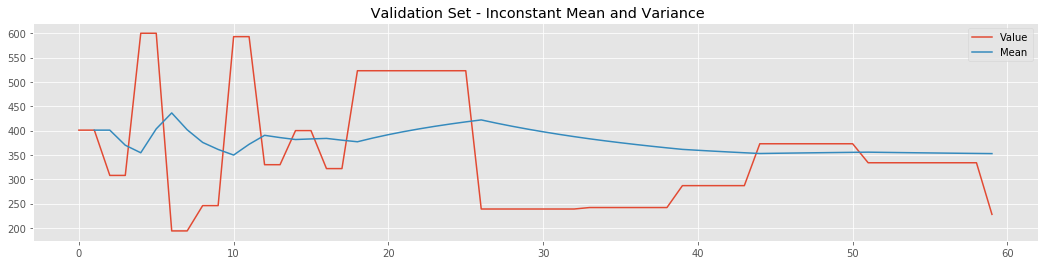

In [358]:
mean = [np.mean(df_val['dengue-sg'].values[:x]) for x in range(df_val['dengue-sg'].shape[0])]
plt.figure(figsize=(18,4))
plt.plot(df_val['dengue-sg'].values, label='Value')
plt.plot(mean, label='Mean')
plt.title(' Validation Set - Inconstant Mean and Variance')
plt.legend()
plt.show()

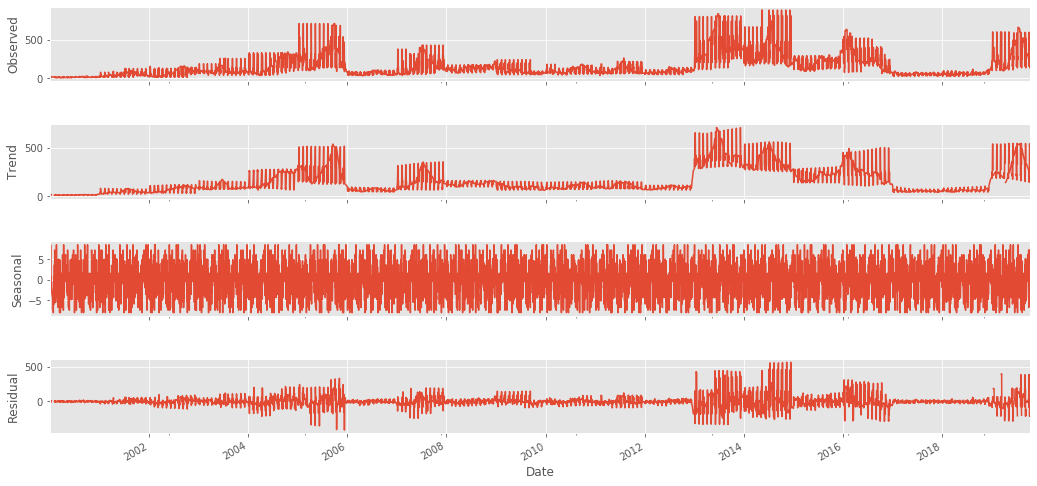

In [359]:
# weekly chart with cycles that repeat every 52 weeks (1 year)
season = seasonal_decompose(df_train['dengue-sg'], freq=52)
fig = season.plot();
fig.set_size_inches(16,8)
#stationarity observed

In [360]:
#Dickey Fuller Test fot Stationarity 
adfinput = adfuller(df_train['dengue-sg'])
adftest = pd.Series(adfinput[0:4], index=['Dickey Fuller Statistical Test', 'P-value',
                                          'Used Lags', 'Number of comments used'])
adftest = round(adftest,4)
    
for key, value in adfinput[4].items():
    adftest["Critical Value (%s)"%key] = value.round(4) 
adftest
#In this case the Dickey Fuller test indicated that the series is  stationary
#p-value < 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is stationary.


Dickey Fuller Statistical Test      -3.9146
P-value                              0.0019
Used Lags                           35.0000
Number of comments used           7164.0000
Critical Value (1%)                 -3.4313
Critical Value (5%)                 -2.8619
Critical Value (10%)                -2.5670
dtype: float64

In [361]:
kpss_input = kpss(df_train['dengue-sg'])
kpss_test = pd.Series(kpss_input[0:3], index=['Statistical Test KPSS', 'P-Value', 'Used Lags'])
kpss_test = round(kpss_test,4)
    
for key, value in kpss_input[3].items():
    kpss_test["Critical Value (%s)"%key] = value 
kpss_test
#p value 0.01 <0.05 hence the data is indeed stationary

Statistical Test KPSS     2.9824
P-Value                   0.0100
Used Lags                35.0000
Critical Value (10%)      0.3470
Critical Value (5%)       0.4630
Critical Value (2.5%)     0.5740
Critical Value (1%)       0.7390
dtype: float64

In [362]:
train_set = df_train.values 
test_set = df_val.values 


In [363]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_close_price = MinMaxScaler()
train_set_scaled = scaler.fit_transform(train_set)
train_close_price = scaler_close_price.fit(df_train['dengue-sg'].values.reshape(-1,1))
test_set_scaled = scaler.fit_transform(test_set)
test_close_price = scaler_close_price.fit(df_val['dengue-sg'].values.reshape(-1,1))



In [364]:
#First five rows of train
train_set_scaled.shape
test_set_scaled.shape


(60, 84)

In [365]:
#First five rows of validation
#First five rows of validation
train_set_scaled

array([[0.40703123, 0.35172854, 0.3252793 , ..., 0.02857143, 0.00228602,
        0.01351351],
       [0.40705528, 0.35176559, 0.32530435, ..., 0.02857143, 0.00228602,
        0.01351351],
       [0.40707934, 0.35180265, 0.32532941, ..., 0.02857143, 0.00228602,
        0.01351351],
       ...,
       [0.58157699, 0.62062468, 0.50708119, ..., 0.15238095, 0.99641452,
        0.27252252],
       [0.58160104, 0.62066174, 0.50710624, ..., 0.17777778, 0.99641452,
        0.27252252],
       [0.5816251 , 0.6206988 , 0.5071313 , ..., 0.2031746 , 0.99641452,
        0.27252252]])

In [366]:
#Now we need to generate regressors (X) and target variable (y) for train and validation.
#A 2D array of regressors and 1-D array of target is created from the original 1-D array of the
#scaled_PRES column in the DataFrames. For the time series forecasting model, the past seven days
#of observations are used to predict for the next day. This is equivalent to an AR(7) model. 
#We define a function that takes the original time series and the number of timesteps as input 
#to return the arrays of X and y:



In [418]:
#Create Train Set. This is the most crucial and tricky part.
#We are creating a training data so that our model will take
#last 60 days of open, high, low and close prices and will predict
#the next day's or tomorrow's closing price. 
#So each sequence will have 4 dimensions and will be predicting the 
#next close price in the sequence.


nb_timesteps = 60

def makeXy(ts, nb_timesteps, features='itself'): 
    """ 
    Input:  
           ts: original time series 
           nb_timesteps: number of time steps in the regressors 
           features: itself == use the previous values of the label only
                     all == use previous values of all avaialable data
    Output:  
           X: 2-D array of regressors 
           y: 1-D array of target  
   """
    x_train = []
    y_train = []

    for i in range(nb_timesteps, ts.shape[0]):
        if features == 'itself':
            x_train.append(train_set_scaled[i-nb_timesteps:i,-1])
        else:
            x_train.append(train_set_scaled[i-nb_timesteps:i, 0:])
        y_train.append(train_set_scaled[i, -1])

    x_train, y_train = np.array(x_train), np.array(y_train)
    return x_train, y_train 

In [419]:
X_train, y_train = makeXy(train_set_scaled, nb_timesteps) 
print('Shape of train arrays:', X_train.shape, y_train.shape) 

Shape of train arrays: (7140, 60) (7140,)


In [420]:
X_train

array([[0.01351351, 0.01351351, 0.01351351, ..., 0.        , 0.        ,
        0.        ],
       [0.01351351, 0.01351351, 0.01351351, ..., 0.        , 0.        ,
        0.01013514],
       [0.01351351, 0.01351351, 0.01351351, ..., 0.        , 0.01013514,
        0.01013514],
       ...,
       [0.53265766, 0.53265766, 0.53265766, ..., 0.27252252, 0.27252252,
        0.27252252],
       [0.53265766, 0.53265766, 0.53265766, ..., 0.27252252, 0.27252252,
        0.27252252],
       [0.53265766, 0.53265766, 0.53265766, ..., 0.27252252, 0.27252252,
        0.27252252]])

In [421]:
data = pd.concat([df_train, df_val], axis=0)
data.reset_index(inplace=True, drop=True)

In [422]:
inputs = data[len(data)-len(df_val) - nb_timesteps :].values
inputs = inputs.reshape(-1,4)
inputs.shape


(2520, 4)

In [423]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)
inputs = scaler.transform(inputs)
inputs

array([[ 1.68283481,  1.65542403, -0.22359065,  0.05531085],
       [ 1.69640292,  1.64162654, -0.22359075,  0.06288103],
       [ 1.68925363,  1.73339804, -0.22359115,  0.06420441],
       ...,
       [-0.55359664, -0.47728613, -0.22360927, -0.20242526],
       [-0.6471874 , -0.47728613, -0.22360596, -0.28806087],
       [-0.46000588, -0.20012594,  4.48044042,  2.9090017 ]])

In [424]:
X_val, y_val = makeXy(inputs, nb_timesteps)
X_val.shape, y_val.shape

((2460, 60), (2460,))

In [425]:
y_train

array([0.01013514, 0.01013514, 0.01013514, ..., 0.27252252, 0.27252252,
       0.27252252])

In [426]:
from keras.layers import Dense, Input, Dropout, Flatten
from keras.optimizers import SGD 
from keras.models import Model, Sequential
from keras.models import load_model 
from keras.callbacks import ModelCheckpoint 

In [427]:
input_layer = Input(shape=(X_train.shape[1],), dtype='float32') 

In [428]:
dense1 = Dense(128, activation='linear')(input_layer) 
dense2 = Dense(63, activation='linear')(dense1) 
dense3 = Dense(32, activation='linear')(dense2) 

In [429]:
dropout_layer = Dropout(0.2)(dense3)

In [430]:
output_layer = Dense(1, activation='linear')(dropout_layer) 

In [431]:
ts_model = Model(inputs=input_layer, outputs=output_layer) 
ts_model.compile(loss='mean_squared_error', optimizer='adam') 
ts_model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         (None, 60)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               7808      
_________________________________________________________________
dense_27 (Dense)             (None, 63)                8127      
_________________________________________________________________
dense_28 (Dense)             (None, 32)                2048      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 33        
Total params: 18,016
Trainable params: 18,016
Non-trainable params: 0
_________________________________________________________________


In [432]:
!mkdir "keras_models"


A subdirectory or file keras_models already exists.


In [435]:
save_weights_at = os.path.join('keras_models', 'dengue_weights.{epoch:02d}-{val_loss:.4f}.hdf5') 
save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0, 
                            save_best_only=True, save_weights_only=False, mode='min', 
                            period=1) 
ts_model.fit(x=X_train, y=y_train, batch_size=32, epochs=50, 
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val), 
             shuffle=True) 

Train on 7140 samples, validate on 2460 samples
Epoch 1/50
7140/7140 [==============================] - 1s 125us/step - loss: 0.0023 - val_loss: 0.0014
Epoch 2/50
7140/7140 [==============================] - 1s 134us/step - loss: 0.0025 - val_loss: 0.0013
Epoch 3/50
7140/7140 [==============================] - 1s 111us/step - loss: 0.0025 - val_loss: 0.0014
Epoch 4/50
7140/7140 [==============================] - 1s 104us/step - loss: 0.0023 - val_loss: 0.0012
Epoch 5/50
7140/7140 [==============================] - 1s 108us/step - loss: 0.0024 - val_loss: 0.0014
Epoch 6/50
7140/7140 [==============================] - 1s 119us/step - loss: 0.0023 - val_loss: 0.0013
Epoch 7/50
7140/7140 [==============================] - 1s 111us/step - loss: 0.0023 - val_loss: 0.0013
Epoch 8/50
7140/7140 [==============================] - 1s 125us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 9/50
7140/7140 [==============================] - 1s 119us/step - loss: 0.0024 - val_loss: 0.0013
Epoch 10/50
7140

In [436]:
best_model = load_model(r"C:\Users\Sid\Documents\code\keras_models\dengue_weights.18-0.0012.hdf5") 
predicted_price = best_model.predict(X_val)
predicted_price = scaler_close_price.inverse_transform(predicted_price)


In [470]:
predicted_price = predicted_price.reshape(60,41)
mean_predicted = []
x= 0
for i in range(predicted_price.shape[0]):
    for j in range(predicted_price.shape[1]):
      x +=predicted_price[i,j]
    mean_predicted.append(x/41)

mean_predicted
        

[199.00729705066215,
 398.27545947563357,
 597.4770481760909,
 798.6200784822789,
 999.7284557063405,
 1199.2211765196266,
 1400.7207567168446,
 1606.8710915170066,
 1816.0321097025057,
 2027.830726809618,
 2239.0965096078266,
 2465.379065536871,
 2691.7823854772055,
 2908.61849380121,
 3122.1717629781583,
 3331.746387760814,
 3542.658029323671,
 3757.183783926615,
 3968.6400083216226,
 4197.185501098633,
 4431.150144623547,
 4665.825017045184,
 4913.945775846156,
 5148.701420853778,
 5381.436791396723,
 5614.4340396043735,
 5841.35419706019,
 6073.514805863543,
 6328.983338146675,
 6590.2948452088895,
 6820.24360433439,
 7047.788531419707,
 7279.745925158989,
 7514.7217637969225,
 7750.4670968404635,
 7974.447192308379,
 8231.405542885384,
 8488.426531535823,
 8774.702117175591,
 9087.827276462462,
 9394.103792144031,
 9702.794904755383,
 10024.398161353134,
 10350.649315066454,
 10623.681760834485,
 10884.152334818025,
 11188.858777302068,
 11519.036472227515,
 11899.642806262505,
 1

In [477]:


np.sqrt(np.square(np.mean(df_val['dengue-sg']-mean_predicted)))

6670.703939254886

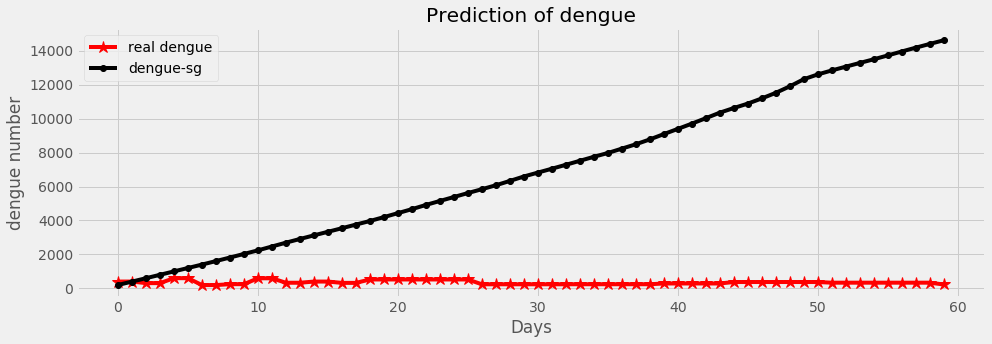

In [479]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,5))
#plt.subplot(121)
plt.plot(df_val['dengue-sg'].values, c='r', label='real dengue', marker='*', markersize=12)
#plt.subplot(122)
plt.plot(mean_predicted, c='k', label='dengue-sg', marker='.', markersize=12)
plt.xlabel('Days')
plt.ylabel('dengue number')
plt.legend()
plt.title('Prediction of dengue')
plt.tight_layout()
plt.savefig('PricePlot.png')

In [481]:
X_train, y_train = makeXy(train_set_scaled, nb_timesteps, features='all') 
print('Shape of train arrays:', X_train.shape, y_train.shape) 
X_val, y_val = makeXy(inputs, nb_timesteps, features='all')
X_val.shape, y_val.shape

Shape of train arrays: (7140, 60, 84) (7140,)


((2460, 60, 84), (2460,))

In [491]:
from keras.layers import Input, Dense, Flatten, Dropout
from keras.layers.convolutional import ZeroPadding1D, Conv1D
from keras.layers.pooling import AveragePooling1D
from keras.optimizers import SGD
from keras.models import Model
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

In [492]:
#Define input layer which has shape (None, 7) and of type float32. None indicates the number of instances
input_layer = Input(shape=(X_train.shape[1],X_train.shape[2]), dtype='float32')
#Add zero padding
zeropadding_layer = ZeroPadding1D(padding=1)(input_layer)

In [493]:
#Add 1D convolution layer
conv1D_layer = Conv1D(64, 6, strides=1, use_bias=True)(zeropadding_layer)

In [494]:
#Add AveragePooling1D layer
avgpooling_layer = AveragePooling1D(pool_size=6, strides=1)(conv1D_layer)

In [495]:
#Add 1D convolution layer
conv1D_layer2 = Conv1D(64, 3, strides=1, use_bias=True)(avgpooling_layer)
#Add AveragePooling1D layer
avgpooling_layer2 = AveragePooling1D(pool_size=3, strides=1)(conv1D_layer2)

In [496]:
#Add Flatten layer
flatten_layer = Flatten()(avgpooling_layer2)
dropout_layer = Dropout(0.2)(flatten_layer)

In [497]:
#Finally the output layer gives prediction for the next day's air pressure.
output_layer = Dense(1, activation='linear')(dropout_layer)

In [498]:
ts_model = Model(inputs=input_layer, outputs=output_layer)
ts_model.compile(loss='mean_absolute_error', optimizer='adam')#SGD(lr=0.001, decay=1e-5))
ts_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 60, 84)            0         
_________________________________________________________________
zero_padding1d_1 (ZeroPaddin (None, 62, 84)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 57, 64)            32320     
_________________________________________________________________
average_pooling1d_1 (Average (None, 52, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 50, 64)            12352     
_________________________________________________________________
average_pooling1d_2 (Average (None, 48, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3072)              0         
__________

In [499]:
!mkdir keras_models_cnn

In [502]:
#save_weights_at = "keras_models_cnn/dengue_weights.{epoch:02d}-{val_loss:.4f}.hdf5"
#save_best = ModelCheckpoint(save_weights_at, monitor='val_loss', verbose=0,
 #                           save_best_only=True, save_weights_only=False, mode='min',
  #                          period=1)
ts_model.fit(x=X_train, y=y_train, batch_size=32, epochs=150,
             verbose=1, callbacks=[save_best], validation_data=(X_val, y_val),
             shuffle=True)

Train on 7140 samples, validate on 2460 samples
Epoch 1/150


InvalidArgumentError: No OpKernel was registered to support Op 'CudnnRNN' used by node cu_dnnlstm_1/CudnnRNN (defined at C:\Users\Sid\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1748) with these attrs: [seed=87654321, dropout=0, T=DT_FLOAT, input_mode="linear_input", direction="unidirectional", rnn_mode="lstm", is_training=true, seed2=0]
Registered devices: [CPU]
Registered kernels:
  <no registered kernels>

	 [[cu_dnnlstm_1/CudnnRNN]]

In [ ]:
best_model = load_model("/content/keras_models_cnn/close_price_1DConv_weights.142-0.0277.hdf5") 
predicted_price = best_model.predict(X_val)
predicted_price = scaler_close_price.inverse_transform(predicted_price)
predicted_price = predicted_price.reshape(28,)

In [ ]:
np.sqrt(np.square(np.mean(df_val.Close-predicted_price)))

In [ ]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,5))
#plt.subplot(121)
plt.plot(df_val.Close.values, c='r', label='real price', marker='*', markersize=12)
#plt.subplot(122)
plt.plot(predicted_price, c='k', label='predicted price', marker='.', markersize=12)
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()